In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import files
mb = files.upload()
mb = files.upload()
mb = files.upload()
mb = files.upload()
mb = files.upload()
mb = files.upload()
mb = files.upload()

Saving AgeGroupDetails.csv to AgeGroupDetails (1).csv


Saving covid_19_india.csv to covid_19_india (1).csv


Saving HospitalBedsIndia.csv to HospitalBedsIndia (1).csv


Saving ICMRTestingLabs.csv to ICMRTestingLabs (1).csv


Saving IndividualDetails.csv to IndividualDetails (1).csv


Saving population_india_census2011.csv to population_india_census2011 (1).csv


Saving StatewiseTestingDetails.csv to StatewiseTestingDetails (1).csv


In [207]:
df = pd.read_csv("covid_19_india.csv")
df1 = pd.read_csv("AgeGroupDetails.csv")
df2 = pd.read_csv("StatewiseTestingDetails.csv")
df3 = pd.read_csv("HospitalBedsIndia.csv")
df4 = pd.read_csv("ICMRTestingLabs.csv")
df5 = pd.read_csv("IndividualDetails.csv")
df6 = pd.read_csv("population_india_census2011.csv")

In [208]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [209]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
5506,5507,23/08/20,8:00 AM,Telengana,-,-,80586,755,104249
5507,5508,23/08/20,8:00 AM,Tripura,-,-,6182,72,8702
5508,5509,23/08/20,8:00 AM,Uttarakhand,-,-,10021,195,14566
5509,5510,23/08/20,8:00 AM,Uttar Pradesh,-,-,131295,2867,182453
5510,5511,23/08/20,8:00 AM,West Bengal,-,-,104959,2737,135596


In [210]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       5511 non-null   int64 
 1   Date                      5511 non-null   object
 2   Time                      5511 non-null   object
 3   State/UnionTerritory      5511 non-null   object
 4   ConfirmedIndianNational   5511 non-null   object
 5   ConfirmedForeignNational  5511 non-null   object
 6   Cured                     5511 non-null   int64 
 7   Deaths                    5511 non-null   int64 
 8   Confirmed                 5511 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 387.6+ KB


In [212]:
df['ConfirmedIndianNational'].unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-'], dtype=object)

In [213]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       5511 non-null   int64         
 1   Date                      5511 non-null   datetime64[ns]
 2   Time                      5511 non-null   object        
 3   State/UnionTerritory      5511 non-null   object        
 4   ConfirmedIndianNational   5511 non-null   object        
 5   ConfirmedForeignNational  5511 non-null   object        
 6   Cured                     5511 non-null   int64         
 7   Deaths                    5511 non-null   int64         
 8   Confirmed                 5511 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 387.6+ KB


In [215]:
df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis=1, inplace=True)

In [216]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [217]:
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
5506,2020-08-23,Telengana,80586,755,104249
5507,2020-08-23,Tripura,6182,72,8702
5508,2020-08-23,Uttarakhand,10021,195,14566
5509,2020-08-23,Uttar Pradesh,131295,2867,182453
5510,2020-08-23,West Bengal,104959,2737,135596


In [218]:
df1.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [219]:
df1.isnull().sum()

Sno           0
AgeGroup      0
TotalCases    0
Percentage    0
dtype: int64

In [220]:
df1.drop('Sno', axis=1, inplace=True)

In [221]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AgeGroup    10 non-null     object
 1   TotalCases  10 non-null     int64 
 2   Percentage  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [222]:
df2.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4436 non-null   object 
 1   State         4436 non-null   object 
 2   TotalSamples  4436 non-null   float64
 3   Negative      2775 non-null   object 
 4   Positive      4216 non-null   float64
dtypes: float64(2), object(3)
memory usage: 173.4+ KB


In [224]:
df2.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        1661
Positive         220
dtype: int64

In [225]:
df2.fillna(0, inplace=True)

In [226]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [227]:
df2['Negative'].unique()

array(['1210', 0, '1175', ..., '258971', '266862', '568'], dtype=object)

In [228]:
df2.loc[[2979]]

,Date,State,TotalSamples,Negative,Positive
2979,2020-06-20,Nagaland,9128.0,,201.0


In [229]:
df2['Negative'].replace(" ", 0, inplace=True)

In [230]:
df2.loc[[2979]]

,Date,State,TotalSamples,Negative,Positive
2979,2020-06-20,Nagaland,9128.0,0,201.0


In [231]:
df2['Negative'] = df2['Negative'].astype(float)

In [232]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4436 non-null   datetime64[ns]
 1   State         4436 non-null   object        
 2   TotalSamples  4436 non-null   float64       
 3   Negative      4436 non-null   float64       
 4   Positive      4436 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 173.4+ KB


In [233]:
df3.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [234]:
df3.drop('Sno',axis=1, inplace=True)

In [235]:
df3.fillna(0, inplace=True)

In [236]:
df3.isnull().sum()

State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        0
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [237]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State/UT                          37 non-null     object 
 1   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 2   NumCommunityHealthCenters_HMIS    37 non-null     int64  
 3   NumSubDistrictHospitals_HMIS      37 non-null     float64
 4   NumDistrictHospitals_HMIS         37 non-null     int64  
 5   TotalPublicHealthFacilities_HMIS  37 non-null     int64  
 6   NumPublicBeds_HMIS                37 non-null     int64  
 7   NumRuralHospitals_NHP18           37 non-null     int64  
 8   NumRuralBeds_NHP18                37 non-null     int64  
 9   NumUrbanHospitals_NHP18           37 non-null     int64  
 10  NumUrbanBeds_NHP18                37 non-null     int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 3.3+ KB


In [240]:
def clean_installs(x):
    x = str(x)
    x = x.replace(",","")
    x = x.replace("+","")
    return int(x)
clean_installs("29,899")

29899

In [241]:
df3["NumPrimaryHealthCenters_HMIS"] = df3["NumPrimaryHealthCenters_HMIS"].map(clean_installs)

In [242]:
df4.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [243]:
df4.isnull().sum()

lab        0
address    0
pincode    0
city       0
state      0
type       0
dtype: int64

In [244]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      267 non-null    object
 1   address  267 non-null    object
 2   pincode  267 non-null    int64 
 3   city     267 non-null    object
 4   state    267 non-null    object
 5   type     267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


In [245]:
df5.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [246]:
df5.isnull().sum()

id                        0
government_id         25185
diagnosed_date            0
age                   25836
gender                22869
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                  1335
dtype: int64

In [247]:
df5.fillna(0, inplace=True)

In [248]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  28182 non-null  int64 
 1   government_id       28182 non-null  object
 2   diagnosed_date      28182 non-null  object
 3   age                 28182 non-null  object
 4   gender              28182 non-null  object
 5   detected_city       28182 non-null  object
 6   detected_district   28182 non-null  object
 7   detected_state      28182 non-null  object
 8   nationality         28182 non-null  object
 9   current_status      28182 non-null  object
 10  status_change_date  28182 non-null  object
 11  notes               28182 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB


In [249]:
df6.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [250]:
df6.isnull().sum()

Sno                        0
State / Union Territory    0
Population                 0
Rural population           0
Urban population           0
Area                       0
Density                    0
Gender Ratio               0
dtype: int64

In [251]:
df6.drop('Sno', axis=1, inplace=True)

Statistical Analysis


In [252]:
df_per_day=df.groupby('Date')['Confirmed','Deaths', 'Cured'].sum().sort_values(by = 'Date', ascending = True)

In [253]:
df_per_day

,Confirmed,Deaths,Cured
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0
...,...,...,...
2020-08-19,2767273,52889,2037870
2020-08-20,2836925,53866,2096664
2020-08-21,2905823,54849,2158946


In [254]:
# First day of the dataset
df_per_day['Confirmed'].idxmin()

Timestamp('2020-01-30 00:00:00')

In [255]:
# Number of cases on first day
df_per_day['Confirmed'].min()

1

In [256]:
# Last date in this dataset
df_per_day['Confirmed'].idxmax()

Timestamp('2020-08-23 00:00:00')

In [257]:
# Total number of cases till the last date
df_per_day['Confirmed'].max()

3044940

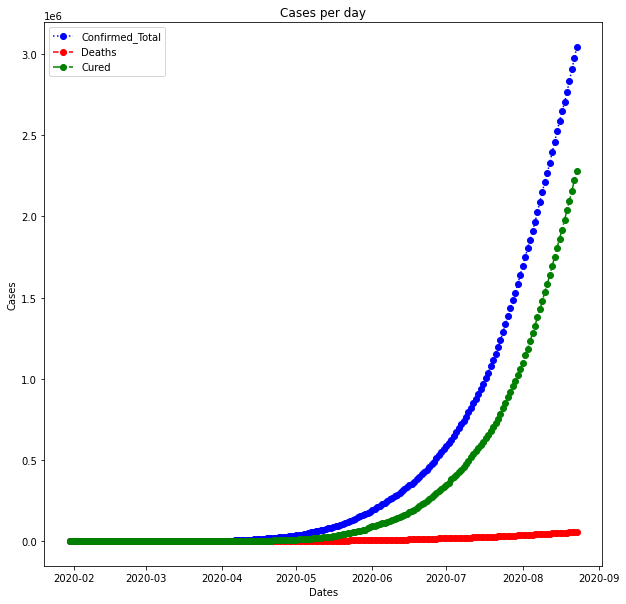

In [258]:

plt.figure(figsize = (10,10))
plt.plot(df_per_day['Confirmed'],'bo', label = 'Confirmed_Total', linestyle = ':')
plt.plot(df_per_day['Deaths'],'ro', label = 'Deaths', linestyle = '--',)
plt.plot(df_per_day['Cured'],'go', label = 'Cured', linestyle = '-.')
plt.title('Cases per day')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.legend()
plt.show()

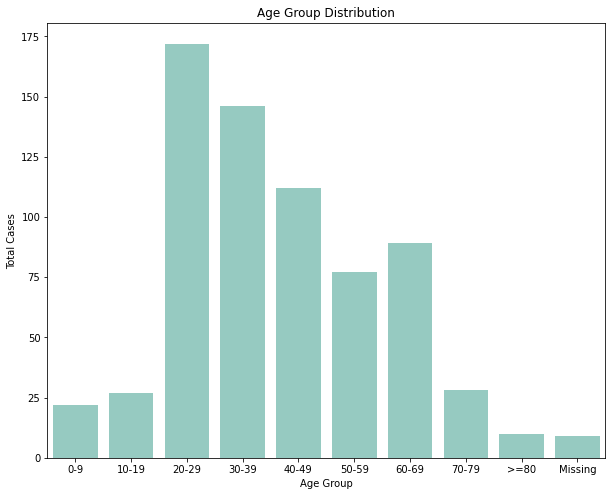

In [259]:
plt.figure(figsize=(10,8))
sns.barplot(data=df1,x='AgeGroup',y='TotalCases',color=sns.color_palette('Set3')[0])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
plt.show()

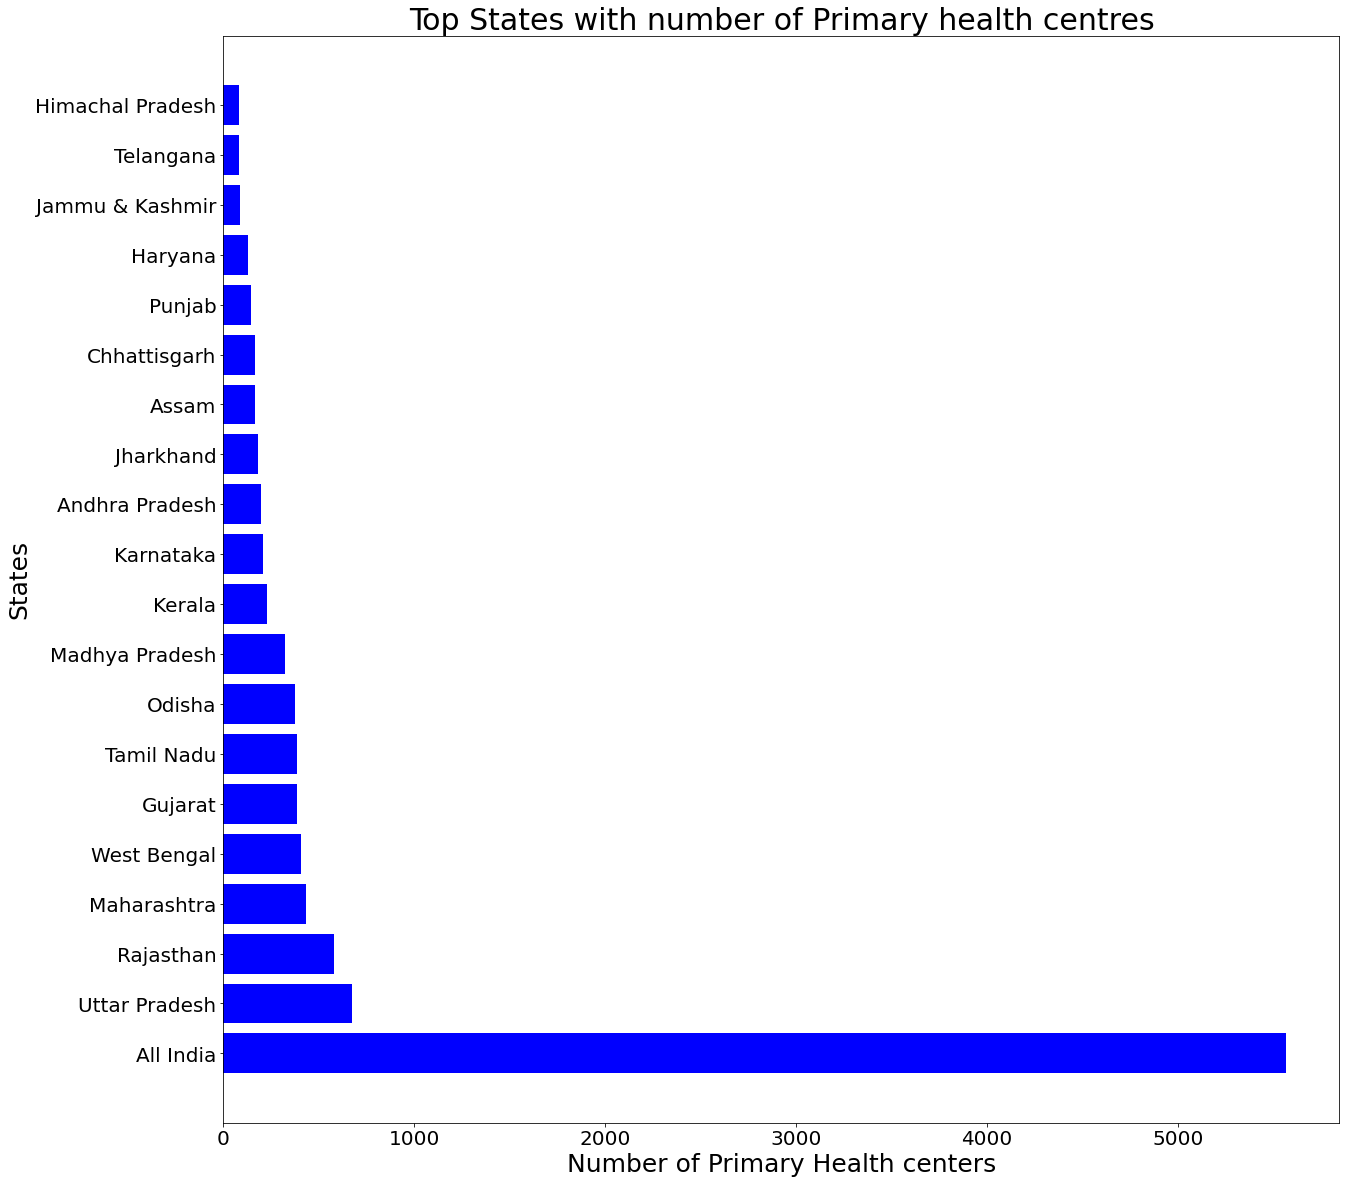

In [260]:
top=df3.nlargest(20,'NumCommunityHealthCenters_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top States with number of Primary health centres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Primary Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top['State/UT'],top['NumCommunityHealthCenters_HMIS'],color='blue',linewidth=1)
plt.show()

In [261]:
df['Active Cases'] = df['Confirmed'] - df['Cured'] - df['Deaths']
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [262]:
import plotly.express as px

In [ ]:
a = df[df['Date']=='2020-08-23']

In [264]:
fig = px.bar(a, x="State/UnionTerritory", y="Active Cases", barmode='group', height=650,width=700)
fig.show()

In [265]:
fig = px.bar(df6, y='Rural population', x='State / Union Territory', text='Rural population')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.show()

In [266]:
fig = px.bar(df6, y='Urban population', x='State / Union Territory', text='Urban population')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.show()

In [267]:
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues')
                        

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,671942,21995,480114,169833,3.270000,71.450000
32,Tamil Nadu,373410,6420,313280,53710,1.720000,83.900000
1,Andhra Pradesh,345216,3189,252638,89389,0.920000,73.180000
18,Karnataka,271876,4615,184568,82693,1.700000,67.890000
39,Uttar Pradesh,182453,2867,131295,48291,1.570000,71.960000
11,Delhi,160016,4284,144138,11594,2.680000,90.080000
41,West Bengal,135596,2737,104959,27900,2.020000,77.410000
4,Bihar,119529,503,94858,24168,0.420000,79.360000
35,Telengana,104249,755,80586,22908,0.720000,77.300000
3,Assam,89468,234,67641,21593,0.260000,75.600000


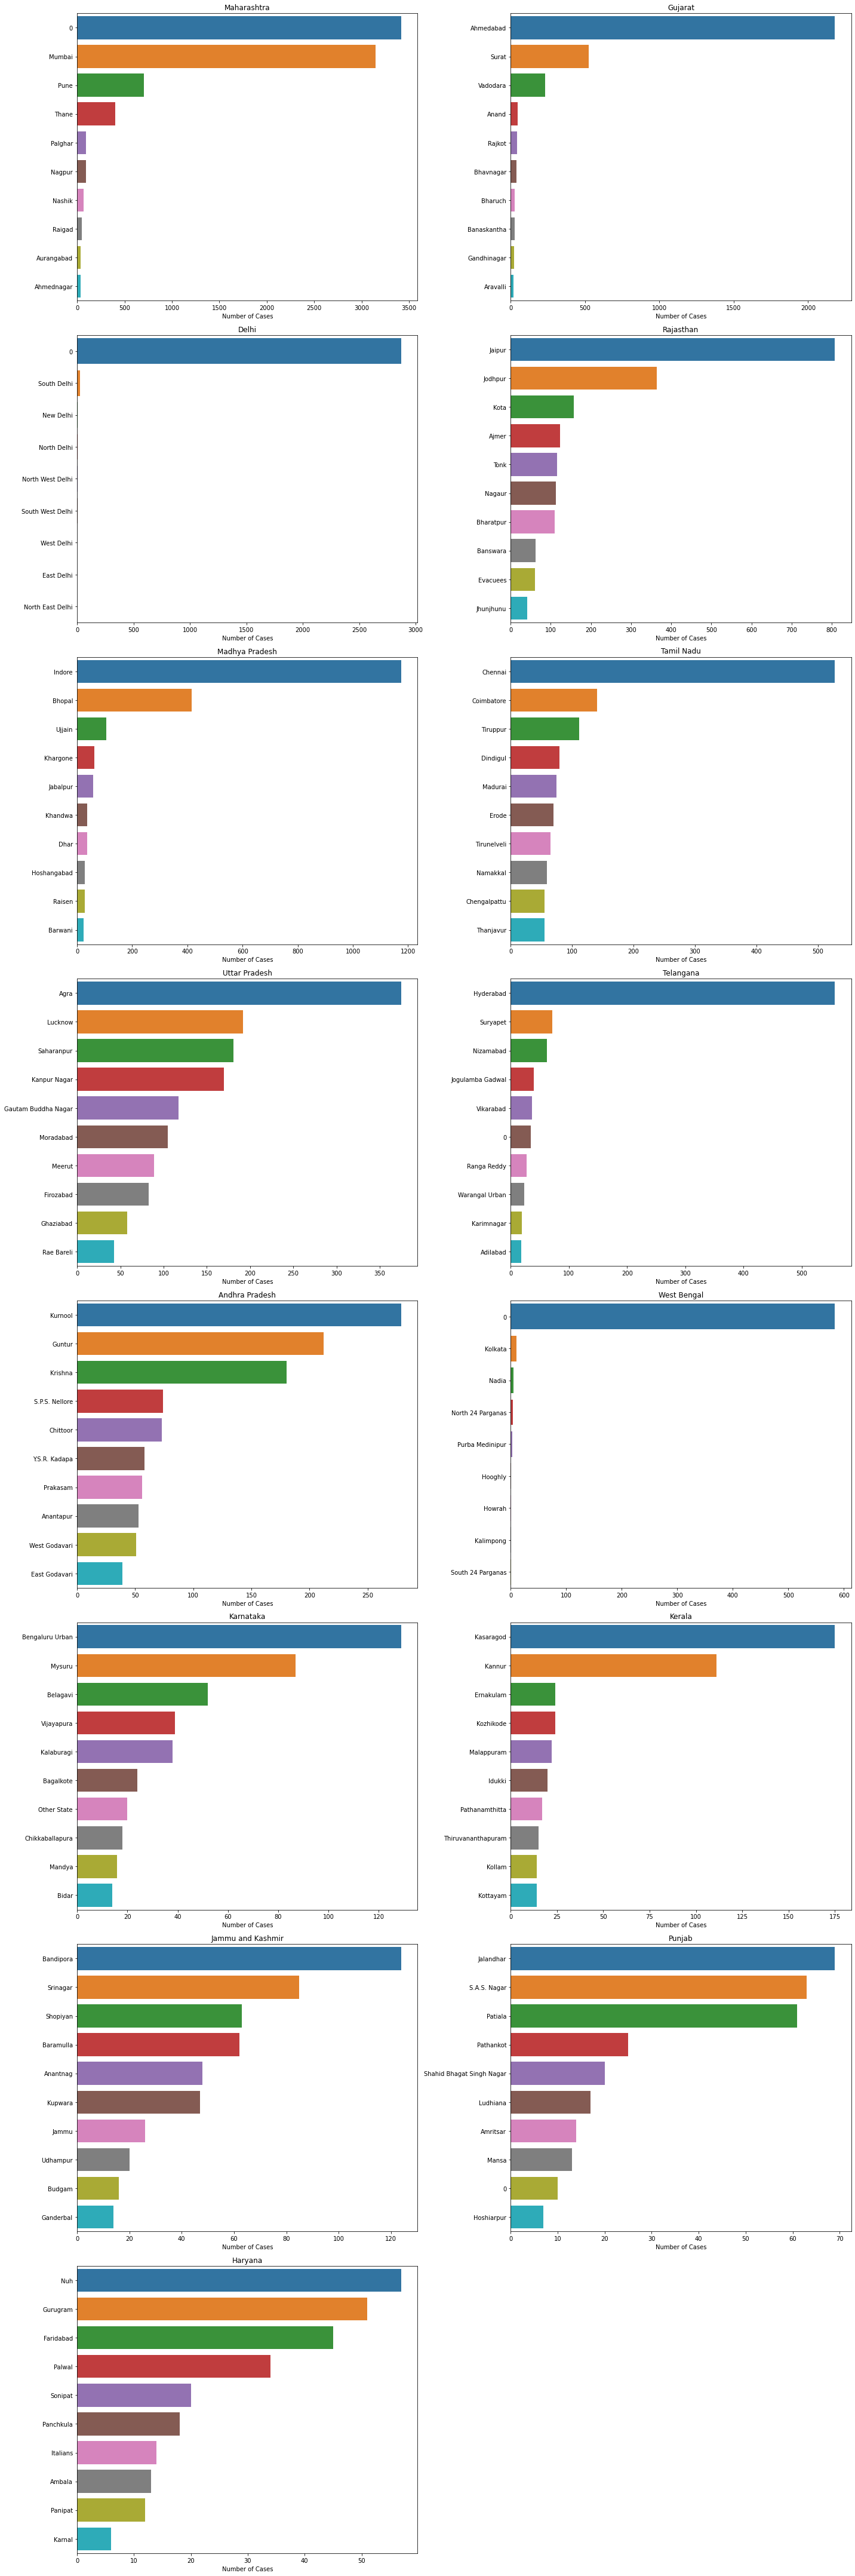

In [268]:
indDetails=df5.groupby(['detected_state','detected_district']).count()
indDetails.reset_index(inplace=True)
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Telangana','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']



plt.figure(figsize=(20,60))
for i,state in enumerate(states_list):
    plt.subplot(8,2,i+1)
    df5_data=indDetails[indDetails['detected_state']==state].sort_values('id',ascending=False)
    df5_data=df5_data.head(10)
    sns.barplot(data=df5_data,x='id',y='detected_district')
    plt.xlabel('Number of Cases')
    plt.ylabel('')
    plt.title(state)
plt.tight_layout()
plt.show()

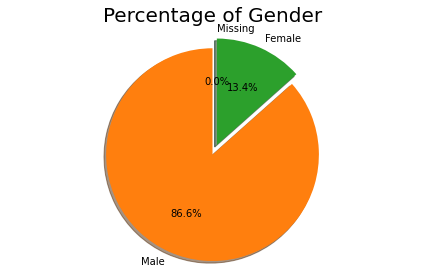

In [269]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(df5['gender'].isnull().sum())
sizes.append(list(df5['gender'].value_counts())[0])
sizes.append(list(df5['gender'].value_counts())[1])

explode = (0, 0.1, 0)



plt.figure()
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

In [270]:
fig = px.histogram(df4, x="state",color ='type')
fig.update_layout(title='ICMR APPROVED LABS')
fig.show()

Predictions

In [271]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from fbprophet import Prophet
import plotly.graph_objects as go
from fbprophet.plot import plot_plotly, add_changepoints_to_plot


In [300]:
#dt = df.groupby(pd.date_range(start='2020-01-30', end='2020-04-24')).sum()

start_date ='2020-01-30'
end_date = '2020-04-14'
mask = (df['Date']>=start_date)&(df['Date']<=end_date)
dt = df.loc[mask]
dt

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
954,2020-04-14,Telengana,100,17,624,507
955,2020-04-14,Tripura,0,0,2,2
956,2020-04-14,Uttarakhand,7,0,35,28
957,2020-04-14,Uttar Pradesh,49,5,657,603


In [301]:
dff = dt.groupby('Date')['Confirmed'].sum().reset_index()
days_since_30_1_2020 = np.array([i for i in range(len(dff))]).reshape(-1, 1)
cc = np.array(dff['Confirmed']).reshape(-1, 1)

In [302]:
days_in_future = 21
future_forecast = np.array([i for i in range(len(dff)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-21]

In [303]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [304]:
start = '01/30/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [305]:
future_forecast_dates

['01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/2020',
 '03/29/2020',
 '03/30/2020',
 '03/31/2020',
 '04/01/2020',
 '04/02/2020',
 '04/03/2020',
 '04/04/2020',
 '04/05/20

In [306]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_30_1_2020, cc, test_size=0.25, shuffle=False)


In [307]:
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
linear_model.score(poly_X_test_confirmed, y_test_confirmed)

MAE: 2050.3158648209806
MSE: 7819213.262768912


0.14710429517533297

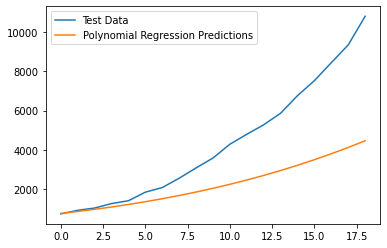

In [308]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.show()

In [309]:
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-21:], 'Predicted number of Confirmed Cases': np.round(linear_pred[-21:])})
poly_df

,Date,Predicted number of Confirmed Cases
0,04/15/2020,4821.0
1,04/16/2020,5205.0
2,04/17/2020,5610.0
3,04/18/2020,6038.0
4,04/19/2020,6490.0
5,04/20/2020,6967.0
6,04/21/2020,7469.0
7,04/22/2020,7997.0
8,04/23/2020,8553.0
9,04/24/2020,9136.0


In [310]:
# svm_confirmed = svm_search.best_estimator_
from sklearn.svm import SVR
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 3328.0792070765447
MSE: 18061488.568961244


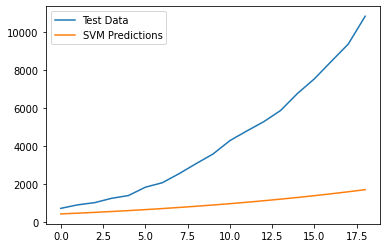

In [311]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [312]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-21:], 'SVM Predicted No of Confirmed Cases': np.round(svm_pred[-21:])})
svm_df

,Date,SVM Predicted No of Confirmed Cases
0,04/15/2020,1823.0
1,04/16/2020,1946.0
2,04/17/2020,2075.0
3,04/18/2020,2212.0
4,04/19/2020,2356.0
5,04/20/2020,2507.0
6,04/21/2020,2665.0
7,04/22/2020,2832.0
8,04/23/2020,3007.0
9,04/24/2020,3190.0


In [313]:
import xgboost as xgb
from xgboost import XGBRegressor

In [314]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 5, n_estimators = 400, objective='reg:squarederror')

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)    
xg_reg.fit(X_train_confirmed, y_train_confirmed)
xg_pred = xg_reg.predict(future_forecast)


y_pred = xg_reg.predict(X_test_confirmed)
print(r2_score(y_test_confirmed,y_pred))

-1.4107873095861092


In [315]:
xgb = pd.DataFrame({'Date': future_forecast_dates[-21:], 'Xgb Predicted No of Confirmed Cases': np.round(xg_pred[-21:])})
xgb

,Date,Xgb Predicted No of Confirmed Cases
0,04/15/2020,694.0
1,04/16/2020,694.0
2,04/17/2020,694.0
3,04/18/2020,694.0
4,04/19/2020,694.0
5,04/20/2020,694.0
6,04/21/2020,694.0
7,04/22/2020,694.0
8,04/23/2020,694.0
9,04/24/2020,694.0


In [316]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=500,max_depth=15,n_jobs=2)
rf_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred=rf_reg.predict(future_forecast)
rf = pd.DataFrame({'Date': future_forecast_dates[-21:], 'RF Predicted No of Confirmed Cases': np.round(y_pred[-21:])})
rf

,Date,RF Predicted No of Confirmed Cases
0,04/15/2020,649.0
1,04/16/2020,649.0
2,04/17/2020,649.0
3,04/18/2020,649.0
4,04/19/2020,649.0
5,04/20/2020,649.0
6,04/21/2020,649.0
7,04/22/2020,649.0
8,04/23/2020,649.0
9,04/24/2020,649.0


In [317]:
from sklearn.tree import DecisionTreeRegressor

In [318]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_30_1_2020, cc, test_size=0.25, shuffle=False)

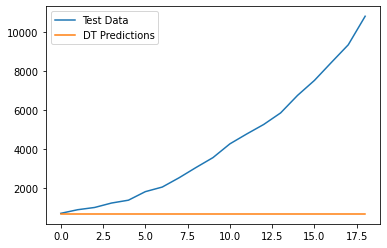

In [319]:
tree=DecisionTreeRegressor()
tree.fit(X_train_confirmed, y_train_confirmed)
tree_pred= tree.predict(future_forecast)
tree_test_pred = tree.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(tree_test_pred)
plt.legend(['Test Data', 'DT Predictions'])
plt.show()

In [320]:
from sklearn.metrics import r2_score
prediction=tree.predict(X_test_confirmed)
r2_score(y_test_confirmed,prediction)

-1.4107862560974551

In [321]:
# Prediction by Prophet Model


dff = df.groupby('Date')['Confirmed'].sum().reset_index()
dff.columns=['ds', 'y']
m = Prophet(interval_width=0.95)
m.fit(dff)

future = m.make_future_dataframe(periods=14, include_history=True)
forecast = m.predict(future)

#fig1 = m.plot(forecast)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines+markers', name='Cases', marker_color='Black'))
fig.update_layout(title="Forecast for 14 days", xaxis_title="Date", yaxis_title="Count")
fig.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [322]:
dff = dt.groupby('Date')['Confirmed'].sum().reset_index()
dff.columns=['ds', 'y']
m = Prophet()
m.fit(dff)

future = m.make_future_dataframe(periods=21, include_history=True)
forecast = m.predict(future)
fig = go.Figure()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(
                  autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Total cases Forecast<b>',
    title_x=0.5,
    paper_bgcolor='khaki',
    plot_bgcolor = "khaki",)
fig.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [325]:
start_date ='2020-01-30'
end_date = '2020-03-25'
mask = (df['Date']>=start_date)&(df['Date']<=end_date)
dt1 = df.loc[mask]
dt1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
360,2020-03-25,Jammu and Kashmir,1,0,7,6
361,2020-03-25,Ladakh,0,0,13,13
362,2020-03-25,Uttar Pradesh,11,0,37,26
363,2020-03-25,Uttarakhand,0,0,4,4


In [326]:

dff1 = dt1.groupby('Date')['Confirmed'].sum().reset_index()
dff1.columns=['ds', 'y']
m = Prophet()
m.fit(dff1)

future = m.make_future_dataframe(periods=21, include_history=True)
forecast = m.predict(future)
fig = go.Figure()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
fig.update_layout(
                  autosize=False,
                  width= 750,
                  height= 800,
    title_text='<b>Covid-19 Total cases Forecast<b>',
    title_x=0.5,
    paper_bgcolor='khaki',
    plot_bgcolor = "khaki",)
fig.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
